<a href="https://colab.research.google.com/github/ilidan16/ilidan16/blob/master/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

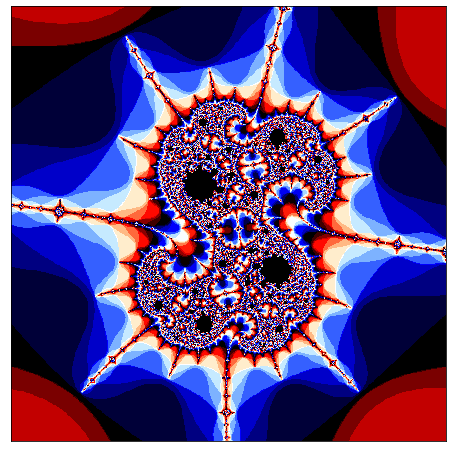

In [11]:
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.colors as clr

from multiprocessing import Pool
#===================================================
# Поиск красивых мест: https://mandel.gart.nz/
"""
x = -1.748187465
y = 0.001251896
zoom = 711920010
d = 1600/zoom
xmin = x-d/2
xmax = x+d/2
ymin = y-d/2
ymax = y+d/2
"""
xmin = -2.5
xmax = 1.5
ymin = -2
ymax = 2


half_x = (xmin + xmax)/2


m = 500
n = 500
itr = 200
border = 2.0
#===================================================
def mandelbrot(xmin,xmax,m,n, ymin=ymin, ymax=ymax, itr=itr, border=border):
    part_image = np.zeros((m, n))
    for i_y, y in enumerate(np.linspace(ymin, ymax, m)):
        for i_x, x in enumerate(np.linspace(xmin, xmax, n)):
            c = x + y * 1j
            z = 0
            for k in range(itr):
                z = z**2 + c
                if abs(z) > border:
                    part_image[i_y,i_x] = k
                    break
    return part_image
#===================================================

if __name__ == '__main__':
    two_images = Pool(2).starmap(mandelbrot, [(xmin,half_x,m,int(n/2)),
                                             (half_x,xmax,m,int(n/2))])


full_image = np.concatenate((two_images[0], two_images[1]), axis=1) #склеиваем


plt.figure(figsize=(8, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(-full_image, cmap='flag')
plt.show()
